# Let's do Clustering - Central London Data Science Project Nights

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

## 1. Load in data

fetch and store the iris data by running: 

```python
data = load_iris()
``` 

This returns an object with the data, flower types, descriptions of the features. 

The actual data is stored inside the object as '`data`' so you should actualy run:

```python
data = load_iris().data
``` 


In [0]:
# load data
data = load_iris().data

## 2. Plot data

You can plot a scatter graph funning 

```python
plt.scatter(x_data, y_data)
plt.show()
```

Plot out some of the data to help you spot if there are any obvious clusters.

You can extract all the data for a single feature with the code:

```python
# : means all of the rows, and the number specifies which column
feature_1_data = data[:,0]
feature_2_data = data[:,1]
feature_3_data = data[:,2]
feature_4_data = data[:,3]
```


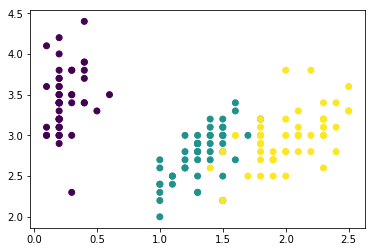

In [5]:
plt.scatter(data[:,3], data[:,1], c=load_iris().target)
plt.show()

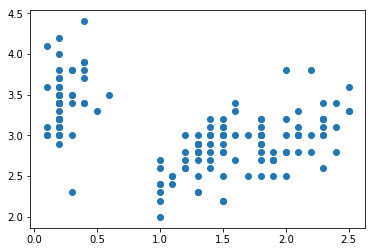

In [6]:
plt.scatter(data[:,3], data[:,1])
plt.show()

## 3. Create Kmean model

Create your KMeans model with `KMeans()` and save it to a variable.

You should also specify the number of clusters you want to use with the `n_clusters` parameter.

In [0]:
clst = KMeans(n_clusters=3)

## 4. fit model to data

Run the clustering algorithm by calling `.fit(data)` on your model and passing in your iris data.

In [8]:
clst.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Examine the cluster centers to see what the averages of the groups are

You can see the cluster centroids by calling `.cluster_centers_` on your model.

You might want to find out what the feature names by running.
```python
print(load_iris()['DESCR'])
```

In [9]:
clst.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

## 5. Get predicted clusters 

On any model in sklearn you get predictions by calling:

```python
model.predict(data)
```

Get the cluster prediction for your data and store them in a varible

In [0]:
clust_cat = clst.predict(data)

Now you should plot some of your data with the cluster predictions showing as colours.

You do this as follows:

```python
plt.scatter(x_data, y_data, c=colour_data)
plt.show()
```

The `colour_data` can be just a list of numbers so the raw output from the `model.predict(data)` should work.

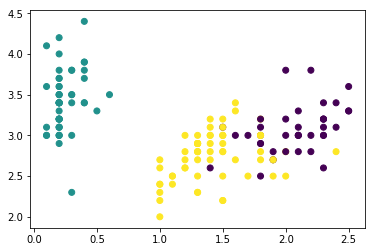

In [13]:
plt.scatter(data[:,3], data[:,1], c=clust_cat)
plt.show()

# EXTRA - Visualize higher dimensions with PCA 
After plotting our cluster prediction you can see that some of the prediction overlap. This would seem strange becuase it looks like some data points are closer to other centroids.

This is an illusion caused by the way we are visualising the data.

We only plotted 2 of the 4 dimension of data that were used in the clustering. So our view of the data is through a specific perspective.

It can appear through 2 dimensions that some data is close, but when distances are calculated using all the dimansions they are in fact further apart.

![dimensionality perspective](ted.jpeg "Title")
[Here is a good video on perspective confusion](https://youtu.be/GFTgkibl7DU?t=30s)



## Using PCA (Principal component analysis)

PCA works by projecting the data down onto lower dimension whilst trying to maintain the original varience of the data.

![pca](https://github.com/ZackAkil/CLDSPN-lets-do-clustering/blob/master/pca.gif?raw=1 )
***https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

Show's PCA projecting 2 dimensions of data down to 1 dimensions

In [0]:
# import PCA 
from sklearn.decomposition import PCA

In [0]:
# create PCA model , specifying the number of 
# dimension you want to project down onto
pca = PCA(n_components=2)

In [0]:
# fit and transform data
pca_data = pca.fit_transform(data)

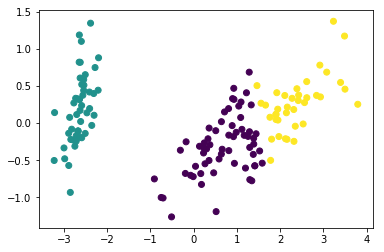

In [0]:
# plot transformed data with our cluster labels (colours)
plt.scatter(pca_data[:,0], pca_data[:,1], c=clust_cat)
plt.show()

You can see now that the "true" distances are better represented in the PCA projected data than before becuase you don't see much overlap of the data labels (colours).